<a href="https://colab.research.google.com/github/rutyroot/ML-Learning/blob/master/Python/Clasification/Clasificacion_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

# Iris Dataset

In [0]:
# Cargamos el dataset del Iris
iris = datasets.load_iris()

In [11]:
print(iris.DESCR)
# Variable del experto para hacer el feature selection
# Antes de realizar el analisis tenemos que sacar la desviación estandard y la clase de correlación. 
# Aquí estadística 
# Cuando hay correlacion de 2 high entonces tenemos que eliminar una, porque tienen dependencia y nos estorbarán en el modelo.
# En este ejemplo la correlacion la hacemos entre la clase y la variable.

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['TARGET'] = iris.target

df_iris.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),TARGET
13,4.3,3.0,1.1,0.1,0
101,5.8,2.7,5.1,1.9,2
75,6.6,3.0,4.4,1.4,1
44,5.1,3.8,1.9,0.4,0
105,7.6,3.0,6.6,2.1,2


In [13]:
print(iris.target_names)
df_iris.groupby('TARGET').agg(['count'])['sepal length (cm)']

['setosa' 'versicolor' 'virginica']


,count
TARGET,
0,50
1,50
2,50


## one tree

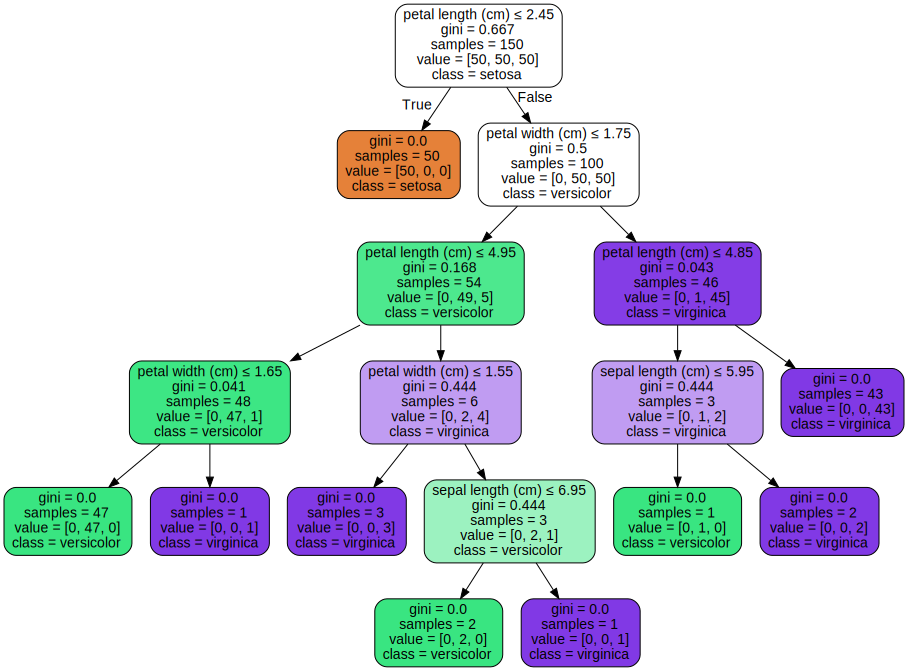

In [15]:
#  En este primer modelo , solo implementaremos un Arbol
from sklearn import tree

# Creamos el modelo
oneTree = tree.DecisionTreeClassifier()

# Entrenamos al modelo
oneTree = oneTree.fit(df_iris[iris.feature_names], df_iris['TARGET'])

# vamos a graficar el arbol obtenido 
import graphviz 
dot_data = tree.export_graphviz(oneTree,out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

## Random Forest

In [16]:
# Procesando las 3 clase del iris con OneHotEncoder
enc = preprocessing.OneHotEncoder(categories='auto')

enc.fit(df_iris['TARGET'].values.reshape(-1, 1))

iris_Y = enc.transform(df_iris['TARGET'].values.reshape(-1, 1)).toarray()
iris_Y.shape

(150, 3)

In [18]:
# Valores Reales
df_iris.loc[45:65,'TARGET']
# One hot encoding  , transposicion de valores : TARGET a otra matriz, ver concepto de One Hot encoding
print(iris_Y[45:65,])


[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [0]:
# Separamos los datasets en datasets de training y de test
percentage_for_test = 0.10
X_train, X_test, Y_train, Y_test = train_test_split(df_iris[iris.feature_names], iris_Y, test_size = percentage_for_test)

In [23]:
Y_test

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [24]:
Y_test.shape

(15, 3)

In [0]:
# Definimos el modelo: Random Forest
model = RandomForestClassifier(n_estimators=3 )

In [30]:
# Entrenamos
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
# Qué variables son más importantes ?
model.feature_importances_

array([0.04905134, 0.02216786, 0.4243383 , 0.5044425 ])

In [0]:
Y_pred = model.predict(X_test)

In [36]:
Y_pred

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [38]:
# Transformos el encoding multilabel a la clase asignada por las predicciones
Y_test_class = Y_test.argmax(axis=1)
Y_pred_class = Y_pred.argmax(axis=1)
print(Y_pred_class)

[2 2 2 0 1 1 1 2 0 1 0 2 2 0 1]


In [0]:
# Evaluemos nuestro modelo sobre el dataset de test
from sklearn.metrics import confusion_matrix, accuracy_score

In [42]:
# Generemos la matriz de confusión
cm = confusion_matrix(Y_test_class, Y_pred_class, labels=[0,1,2])
df_cm = pd.DataFrame(cm, columns= iris.target_names, index = iris.target_names  )
df_cm 

,setosa,versicolor,virginica
setosa,4,0,0
versicolor,0,5,0
virginica,0,0,6


In [41]:
# Obtengamos el accuracy del modelo
accuracy_score(Y_test_class, Y_pred_class)

1.0